In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('bitcoin_2012-01-01_to_2018-10-31.csv')
df.index = df.iloc[:,0]
df = df.iloc[:,1:]
df.head(5)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011/12/31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012/1/1,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012/1/2,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012/1/3,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012/1/4,5.200000,5.223333,5.200000,5.223333,11.914807,63.119578,5.208159


In [10]:
close = df.Close
close.describe()
lag5close = close.shift(5)
close.head(10)

Timestamp
2011/12/31    4.482500
2012/1/1      4.806667
2012/1/2      5.000000
2012/1/3      5.252500
2012/1/4      5.223333
2012/1/5      6.286190
2012/1/6      6.445000
2012/1/7      6.800000
2012/1/8      6.950000
2012/1/9      6.581667
Name: Close, dtype: float64

In [11]:
lag5close.head(10)

Timestamp
2011/12/31         NaN
2012/1/1           NaN
2012/1/2           NaN
2012/1/3           NaN
2012/1/4           NaN
2012/1/5      4.482500
2012/1/6      4.806667
2012/1/7      5.000000
2012/1/8      5.252500
2012/1/9      5.223333
Name: Close, dtype: float64

In [12]:
momentum5 = close - lag5close
momentum5.tail()

Timestamp
2018/10/27      1.270874
2018/10/28      7.090637
2018/10/29   -100.231614
2018/10/30   -136.387597
2018/10/31   -123.036831
Name: Close, dtype: float64

Text(0, 0.5, 'momentum5')

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


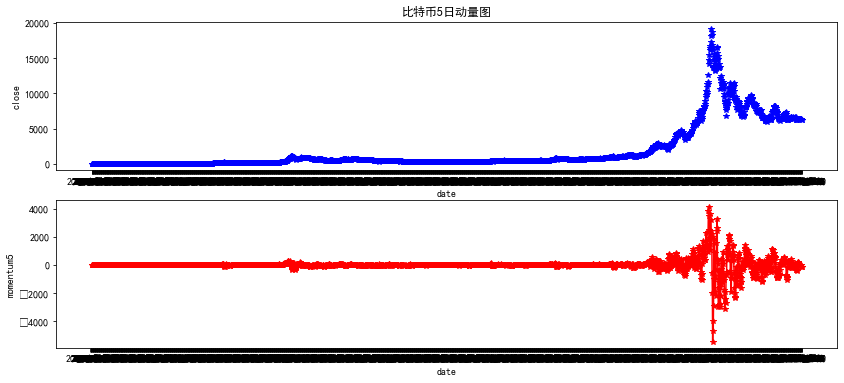

In [13]:
#绘制收盘价和五日动量曲线
plt.figure(figsize=(14,6))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.subplot(211)
plt.plot(close,'b*')
plt.xlabel('date')
plt.ylabel('close')
plt.title('比特币5日动量图')
plt.subplot(212)
plt.plot(momentum5,'r-*')
plt.xlabel('date')
plt.ylabel('momentum5')

In [14]:
momen5 = close / lag5close-1
momen5 = momen5.dropna()
momen5[0:5]

Timestamp
2012/1/5    0.402385
2012/1/6    0.340846
2012/1/7    0.360000
2012/1/8    0.323179
2012/1/9    0.260051
Name: Close, dtype: float64

In [15]:
def momentum(price,periond):
    lagPrice = price.shift(periond)
    momen = price - lagPrice
    momen = momen.dropna()
    return momen

In [16]:
momentum(close,5).tail(n=5)
momen35 = momentum(close,35)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter,WeekdayLocator,DayLocator,MONDAY,date2num
from mpl_finance import candlestick_ohlc

D:\anaconda\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [20]:
! pip install mpl_finance

In [ ]:
# 定义 candleLinePlots 函数
def candleLinePlots